In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Data Pre-Processing

In [2]:
#Testing for CVD, using max reduced csv file
heart_cvd = pd.read_csv('max_reduce.csv')

#Use Matt's params: (age) + (cigs) (chol) (bmi) (glu) (hr) (bp) (female) Clean to columns needed
heart_cvd = heart_cvd[['SEX','AGE','CIGPDAY','HEARTRTE','SYSBP','TOTCHOL','BMI','GLUCOSE','CVD']]
heart_cvd.head()

,SEX,AGE,CIGPDAY,HEARTRTE,SYSBP,TOTCHOL,BMI,GLUCOSE,CVD
0,1,39,0.0,80.0,106.0,195.0,26.97,77.0,1
1,2,46,0.0,95.0,121.0,250.0,28.73,76.0,0
2,2,52,0.0,80.0,105.0,260.0,29.43,86.0,0
3,2,58,0.0,80.0,108.0,237.0,28.50,71.0,0
4,1,48,20.0,75.0,127.5,245.0,25.34,70.0,0


In [3]:
#Encode SEX column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
heart_cvd['SEX'] = label_encoder.fit_transform(heart_cvd['SEX'])

In [4]:
#Set up for CVD to test
X = heart_cvd.drop("CVD", axis=1)
y = heart_cvd["CVD"]
print(X.shape, y.shape)

(9310, 8) (9310,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape, y_train.shape)

(6982, 8) (6982,)


In [6]:
#6982 training set; 3491 validation set; shuffle data
np.random.shuffle(X_train_scaled)

x_val = X_train_scaled[:3491]
partial_x_train = X_train_scaled[3491:]

y_val = y_train[:3491]
partial_y_train = y_train[3491:]

# Create Deep Learning Models

### Validation Model

In [7]:
#First validation model
from keras.models import Sequential
from keras.layers import Dense

valid_model = Sequential()
valid_model.add(Dense(units=7, activation='relu', input_dim=8))
valid_model.add(Dense(units=7, activation='relu'))
valid_model.add(Dense(units=1, activation='sigmoid'))

from keras.metrics import categorical_accuracy
valid_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
valid = valid_model.fit(
    partial_x_train,
    partial_y_train,
    epochs=500,
    shuffle=True,
    validation_data=(x_val, y_val),
    verbose=2
)

Using TensorFlow backend.


Train on 3491 samples, validate on 3491 samples
Epoch 1/500
 - 0s - loss: 0.6361 - acc: 0.6944 - val_loss: 0.5973 - val_acc: 0.7565
Epoch 2/500
 - 0s - loss: 0.5923 - acc: 0.7385 - val_loss: 0.5742 - val_acc: 0.7577
Epoch 3/500
 - 0s - loss: 0.5833 - acc: 0.7385 - val_loss: 0.5675 - val_acc: 0.7577
Epoch 4/500
 - 0s - loss: 0.5797 - acc: 0.7385 - val_loss: 0.5642 - val_acc: 0.7577
Epoch 5/500
 - 0s - loss: 0.5776 - acc: 0.7385 - val_loss: 0.5622 - val_acc: 0.7577
Epoch 6/500
 - 0s - loss: 0.5761 - acc: 0.7385 - val_loss: 0.5607 - val_acc: 0.7577
Epoch 7/500
 - 0s - loss: 0.5754 - acc: 0.7385 - val_loss: 0.5601 - val_acc: 0.7577
Epoch 8/500
 - 0s - loss: 0.5751 - acc: 0.7385 - val_loss: 0.5592 - val_acc: 0.7577
Epoch 9/500
 - 0s - loss: 0.5745 - acc: 0.7385 - val_loss: 0.5592 - val_acc: 0.7577
Epoch 10/500
 - 0s - loss: 0.5739 - acc: 0.7385 - val_loss: 0.5590 - val_acc: 0.7577
Epoch 11/500
 - 0s - loss: 0.5736 - acc: 0.7385 - val_loss: 0.5591 - val_acc: 0.7577
Epoch 12/500
 - 0s - loss:

Epoch 97/500
 - 0s - loss: 0.5650 - acc: 0.7396 - val_loss: 0.5594 - val_acc: 0.7568
Epoch 98/500
 - 0s - loss: 0.5648 - acc: 0.7402 - val_loss: 0.5604 - val_acc: 0.7565
Epoch 99/500
 - 0s - loss: 0.5647 - acc: 0.7396 - val_loss: 0.5600 - val_acc: 0.7574
Epoch 100/500
 - 0s - loss: 0.5646 - acc: 0.7390 - val_loss: 0.5601 - val_acc: 0.7574
Epoch 101/500
 - 0s - loss: 0.5645 - acc: 0.7399 - val_loss: 0.5611 - val_acc: 0.7568
Epoch 102/500
 - 0s - loss: 0.5645 - acc: 0.7393 - val_loss: 0.5599 - val_acc: 0.7571
Epoch 103/500
 - 0s - loss: 0.5642 - acc: 0.7396 - val_loss: 0.5601 - val_acc: 0.7568
Epoch 104/500
 - 0s - loss: 0.5644 - acc: 0.7388 - val_loss: 0.5606 - val_acc: 0.7571
Epoch 105/500
 - 0s - loss: 0.5641 - acc: 0.7393 - val_loss: 0.5602 - val_acc: 0.7571
Epoch 106/500
 - 0s - loss: 0.5640 - acc: 0.7399 - val_loss: 0.5602 - val_acc: 0.7571
Epoch 107/500
 - 0s - loss: 0.5638 - acc: 0.7399 - val_loss: 0.5609 - val_acc: 0.7568
Epoch 108/500
 - 0s - loss: 0.5639 - acc: 0.7388 - val_lo

Epoch 193/500
 - 0s - loss: 0.5606 - acc: 0.7396 - val_loss: 0.5656 - val_acc: 0.7562
Epoch 194/500
 - 0s - loss: 0.5607 - acc: 0.7402 - val_loss: 0.5656 - val_acc: 0.7551
Epoch 195/500
 - 0s - loss: 0.5608 - acc: 0.7402 - val_loss: 0.5662 - val_acc: 0.7548
Epoch 196/500
 - 0s - loss: 0.5608 - acc: 0.7396 - val_loss: 0.5652 - val_acc: 0.7548
Epoch 197/500
 - 0s - loss: 0.5606 - acc: 0.7399 - val_loss: 0.5654 - val_acc: 0.7565
Epoch 198/500
 - 0s - loss: 0.5603 - acc: 0.7396 - val_loss: 0.5659 - val_acc: 0.7551
Epoch 199/500
 - 0s - loss: 0.5607 - acc: 0.7396 - val_loss: 0.5657 - val_acc: 0.7557
Epoch 200/500
 - 0s - loss: 0.5604 - acc: 0.7396 - val_loss: 0.5657 - val_acc: 0.7559
Epoch 201/500
 - 0s - loss: 0.5607 - acc: 0.7396 - val_loss: 0.5658 - val_acc: 0.7559
Epoch 202/500
 - 0s - loss: 0.5608 - acc: 0.7396 - val_loss: 0.5656 - val_acc: 0.7551
Epoch 203/500
 - 0s - loss: 0.5603 - acc: 0.7396 - val_loss: 0.5652 - val_acc: 0.7554
Epoch 204/500
 - 0s - loss: 0.5603 - acc: 0.7399 - val

Epoch 289/500
 - 0s - loss: 0.5592 - acc: 0.7405 - val_loss: 0.5683 - val_acc: 0.7559
Epoch 290/500
 - 0s - loss: 0.5593 - acc: 0.7399 - val_loss: 0.5673 - val_acc: 0.7562
Epoch 291/500
 - 0s - loss: 0.5593 - acc: 0.7399 - val_loss: 0.5676 - val_acc: 0.7559
Epoch 292/500
 - 0s - loss: 0.5593 - acc: 0.7399 - val_loss: 0.5687 - val_acc: 0.7554
Epoch 293/500
 - 0s - loss: 0.5593 - acc: 0.7402 - val_loss: 0.5688 - val_acc: 0.7548
Epoch 294/500
 - 0s - loss: 0.5591 - acc: 0.7390 - val_loss: 0.5691 - val_acc: 0.7548
Epoch 295/500
 - 0s - loss: 0.5592 - acc: 0.7402 - val_loss: 0.5681 - val_acc: 0.7562
Epoch 296/500
 - 0s - loss: 0.5591 - acc: 0.7396 - val_loss: 0.5686 - val_acc: 0.7557
Epoch 297/500
 - 0s - loss: 0.5592 - acc: 0.7396 - val_loss: 0.5684 - val_acc: 0.7554
Epoch 298/500
 - 0s - loss: 0.5591 - acc: 0.7405 - val_loss: 0.5686 - val_acc: 0.7559
Epoch 299/500
 - 0s - loss: 0.5590 - acc: 0.7402 - val_loss: 0.5678 - val_acc: 0.7559
Epoch 300/500
 - 0s - loss: 0.5591 - acc: 0.7399 - val

Epoch 385/500
 - 0s - loss: 0.5580 - acc: 0.7410 - val_loss: 0.5710 - val_acc: 0.7551
Epoch 386/500
 - 0s - loss: 0.5581 - acc: 0.7408 - val_loss: 0.5713 - val_acc: 0.7542
Epoch 387/500
 - 0s - loss: 0.5579 - acc: 0.7413 - val_loss: 0.5704 - val_acc: 0.7539
Epoch 388/500
 - 0s - loss: 0.5580 - acc: 0.7410 - val_loss: 0.5706 - val_acc: 0.7542
Epoch 389/500
 - 0s - loss: 0.5581 - acc: 0.7405 - val_loss: 0.5707 - val_acc: 0.7542
Epoch 390/500
 - 0s - loss: 0.5580 - acc: 0.7408 - val_loss: 0.5709 - val_acc: 0.7534
Epoch 391/500
 - 0s - loss: 0.5577 - acc: 0.7413 - val_loss: 0.5704 - val_acc: 0.7548
Epoch 392/500
 - 0s - loss: 0.5579 - acc: 0.7416 - val_loss: 0.5710 - val_acc: 0.7559
Epoch 393/500
 - 0s - loss: 0.5580 - acc: 0.7402 - val_loss: 0.5705 - val_acc: 0.7542
Epoch 394/500
 - 0s - loss: 0.5578 - acc: 0.7413 - val_loss: 0.5708 - val_acc: 0.7551
Epoch 395/500
 - 0s - loss: 0.5577 - acc: 0.7410 - val_loss: 0.5705 - val_acc: 0.7539
Epoch 396/500
 - 0s - loss: 0.5581 - acc: 0.7413 - val

Epoch 481/500
 - 0s - loss: 0.5570 - acc: 0.7396 - val_loss: 0.5730 - val_acc: 0.7537
Epoch 482/500
 - 0s - loss: 0.5572 - acc: 0.7410 - val_loss: 0.5730 - val_acc: 0.7519
Epoch 483/500
 - 0s - loss: 0.5577 - acc: 0.7402 - val_loss: 0.5729 - val_acc: 0.7528
Epoch 484/500
 - 0s - loss: 0.5570 - acc: 0.7413 - val_loss: 0.5724 - val_acc: 0.7534
Epoch 485/500
 - 0s - loss: 0.5570 - acc: 0.7410 - val_loss: 0.5725 - val_acc: 0.7525
Epoch 486/500
 - 0s - loss: 0.5573 - acc: 0.7402 - val_loss: 0.5730 - val_acc: 0.7528
Epoch 487/500
 - 0s - loss: 0.5569 - acc: 0.7416 - val_loss: 0.5739 - val_acc: 0.7522
Epoch 488/500
 - 0s - loss: 0.5571 - acc: 0.7399 - val_loss: 0.5726 - val_acc: 0.7548
Epoch 489/500
 - 0s - loss: 0.5571 - acc: 0.7408 - val_loss: 0.5736 - val_acc: 0.7531
Epoch 490/500
 - 0s - loss: 0.5571 - acc: 0.7413 - val_loss: 0.5732 - val_acc: 0.7542
Epoch 491/500
 - 0s - loss: 0.5572 - acc: 0.7410 - val_loss: 0.5732 - val_acc: 0.7539
Epoch 492/500
 - 0s - loss: 0.5571 - acc: 0.7410 - val

## Quantify our Validation Model

In [ ]:
model_loss, model_accuracy = valid_model.evaluate(
    partial_x_train, partial_y_train, verbose=2)
print(
    f"Main Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

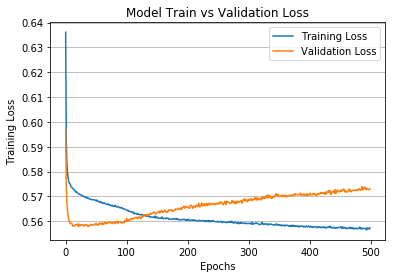

In [8]:
# Plot validation loss
plt.plot(valid.history['loss'])
plt.plot(valid.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.grid(axis='y')
fig1 = plt.gcf()
plt.show()

In [9]:
fig1.savefig('overfit.png', dpi=100, bbox_inches="tight")

### Training Model

In [11]:
#Then training model, adjusting epochs to 150 based on validation
from keras.models import Sequential
from keras.layers import Dense

main_model = Sequential()
main_model.add(Dense(units=7, activation='relu', input_dim=8))
main_model.add(Dense(units=7, activation='relu'))
main_model.add(Dense(units=1, activation='sigmoid'))

from keras.metrics import binary_accuracy
main_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
main = main_model.fit(
    X_train_scaled,
    y_train,
    epochs=130,
    shuffle=True,
    verbose=2
)

Epoch 1/130
 - 1s - loss: 0.6251 - acc: 0.6808
Epoch 2/130
 - 0s - loss: 0.5766 - acc: 0.7481
Epoch 3/130
 - 0s - loss: 0.5699 - acc: 0.7481
Epoch 4/130
 - 0s - loss: 0.5679 - acc: 0.7481
Epoch 5/130
 - 0s - loss: 0.5669 - acc: 0.7481
Epoch 6/130
 - 0s - loss: 0.5658 - acc: 0.7481
Epoch 7/130
 - 0s - loss: 0.5653 - acc: 0.7481
Epoch 8/130
 - 0s - loss: 0.5646 - acc: 0.7481
Epoch 9/130
 - 0s - loss: 0.5643 - acc: 0.7481
Epoch 10/130
 - 0s - loss: 0.5638 - acc: 0.7481
Epoch 11/130
 - 0s - loss: 0.5635 - acc: 0.7481
Epoch 12/130
 - 0s - loss: 0.5634 - acc: 0.7481
Epoch 13/130
 - 0s - loss: 0.5632 - acc: 0.7481
Epoch 14/130
 - 0s - loss: 0.5631 - acc: 0.7481
Epoch 15/130
 - 0s - loss: 0.5626 - acc: 0.7481
Epoch 16/130
 - 0s - loss: 0.5626 - acc: 0.7481
Epoch 17/130
 - 0s - loss: 0.5622 - acc: 0.7481
Epoch 18/130
 - 0s - loss: 0.5621 - acc: 0.7481
Epoch 19/130
 - 0s - loss: 0.5619 - acc: 0.7482
Epoch 20/130
 - 0s - loss: 0.5621 - acc: 0.7481
Epoch 21/130
 - 0s - loss: 0.5619 - acc: 0.7481
E

## Quantify our Trained Models

In [12]:
model_loss, model_accuracy = main_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Main Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Main Normal Neural Network - Loss: 0.5607571524033432, Accuracy: 0.7491408934707904


In [13]:
# Accuracy on light/dense model
def pred_count(heart_cvd):
    corr = 0
    wron = 0
    for index, row in heart_cvd.iterrows():
        if row['predicted'] == row['actual']:
            corr = corr + 1
        else:
            wron = wron + 1

    print(f'Correct predictions: {corr}')
    print(f'Incorrect predictions: {wron}')

predictions = main_model.predict_classes(X_test_scaled)
test_df = pd.DataFrame({'predicted':np.ravel(predictions),'actual':np.ravel(y_test)})
pred_count(test_df)

Correct predictions: 1744
Incorrect predictions: 584


In [14]:
#Export to json
import json
with open('main_cvd.json', 'w') as f:
    json.dump(main.history, f)

In [15]:
import json
with open('main_cvd.json', 'r') as f:
        history = json.load(f) 

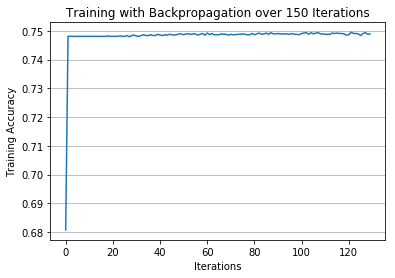

In [16]:
plt.plot(main.history['acc'])
plt.title('Training with Backpropagation over 150 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

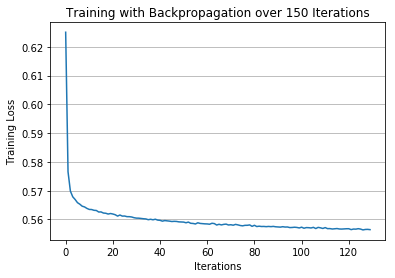

In [17]:
plt.plot(main.history['loss'])
plt.title('Training with Backpropagation over 150 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [18]:
# Save the main model
main_model.save("framingham_cvd.h5")

# Loading a Model

In [19]:
import pandas as pd
# Load the model
from keras.models import load_model
cvd_model = load_model("framingham_cvd.h5")

## Evaluating the loaded model

In [20]:
#Load the light model
model_loss, model_accuracy = cvd_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5607571524033432, Accuracy: 0.7491408934707904


In [30]:
# create a sample "bad" patient, not from data
pt = {'SEX':[1],'AGE':[60],'CIGPDAY':[90],'HEARTRTE':[95],'SYSBP':[180],
     'TOTCHOL':[200],'BMI':[35],'GLUCOSE':[200]}
bad_patient = pd.DataFrame(pt)

# return probability of response (cvd)
cvd_model.predict_proba(bad_patient)

array([[1.]], dtype=float32)

In [31]:
print(f"Predicted class: {cvd_model.predict_classes(bad_patient)}")

Predicted class: [[1]]


In [23]:
# create a sample "good" patient, not from data
pt2 = {'SEX':[1],'AGE':[50],'CIGPDAY':[0],'HEARTRTE':[65],'SYSBP':[120],
     'TOTCHOL':[120],'BMI':[23],'GLUCOSE':[99]}
good_patient = pd.DataFrame(pt2)

# return probability of response (cvd)
cvd_model.predict_proba(good_patient)

array([[0.0007678]], dtype=float32)

In [25]:
print(f"Predicted class: {cvd_model.predict_classes(good_patient)}")

Predicted class: [[0]]


In [32]:
# create a sample "bad" patient, not from data
nw = {'SEX':[1],'AGE':[81],'CIGPDAY':[90],'HEARTRTE':[220],'SYSBP':[295],
     'TOTCHOL':[696],'BMI':[56.8],'GLUCOSE':[478]}
nwpatient = pd.DataFrame(nw)

# return probability of response (cvd)
cvd_model.predict_proba(nwpatient)

array([[0.]], dtype=float32)

In [33]:
print(f"Predicted class: {cvd_model.predict_classes(nwpatient)}")

Predicted class: [[0]]
